In [ ]:
!pip install lifelines

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import datetimes_to_durations

In [481]:
#import dataset
df = pd.read_csv("/content/employeeturnover.csv", encoding='ISO-8859-1')
df.head()                                   

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


#Kaplan Meier Estimator

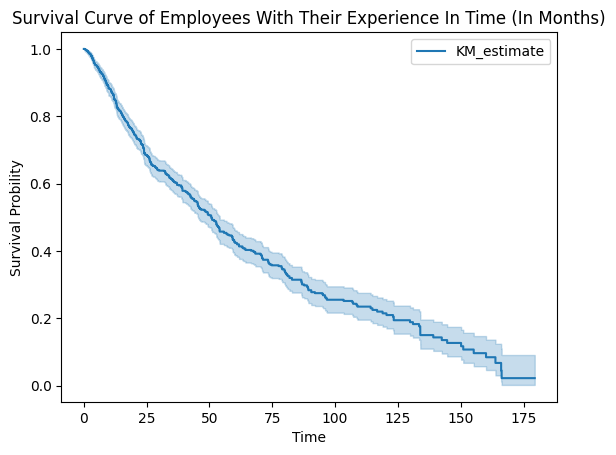

In [483]:
#Kaplan - Meier
model = KaplanMeierFitter()
model.fit(durations = df.stag,
          event_observed = df.event)

model.plot()
plt.title("Survival Curve of Employees With Their Experience In Time (In Months)")
plt.xlabel("Time")
plt.ylabel("Survival Probility")
plt.show()

In [484]:
male = df[df["gender"] == "m"]
female = df[df["gender"] == "f"]
female.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
5,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
7,120.443532,1,f,28.0,Retail,HR,referal,no,m,white,bus,3.8,5.5,8.0,4.0,4.4


In [485]:
#Kaplan - Meier per gender
model_males = KaplanMeierFitter()
model_males.fit(durations = male.stag,
                event_observed = male.event)
model_females = KaplanMeierFitter()
model_females.fit(durations = female.stag,
                  event_observed = female.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 853 total observations, 417 right-censored observations>

Text(0, 0.5, 'Survival Probility')

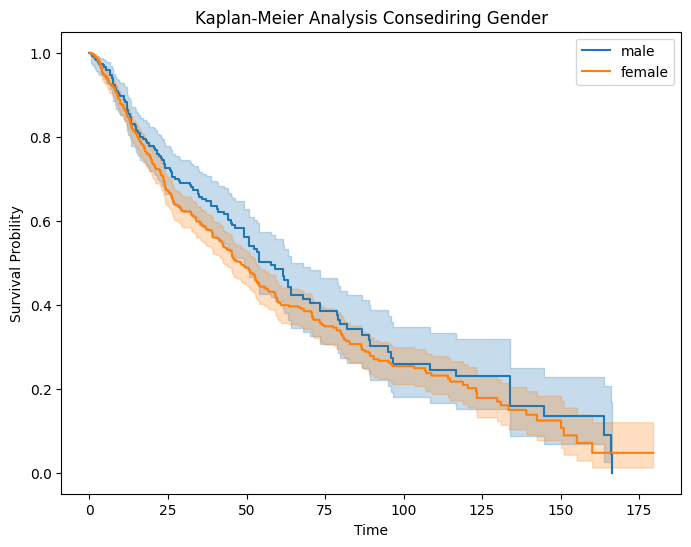

In [486]:
model_males.plot(figsize = (8,6), label = "male")
model_females.plot(label = "female")
plt.title("Kaplan-Meier Analysis Consediring Gender")
plt.xlabel("Time")
plt.ylabel("Survival Probility")

In [487]:
coach_yes = df[df["coach"] == "yes"]
coach_no = df[df["coach"] == "no"]
coach_yes.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
5,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
9,4.435318,1,f,30.0,Consult,Marketing,youjs,yes,m,white,bus,5.4,5.5,3.3,7.9,8.3
11,20.928131,1,m,23.0,Banks,HR,referal,yes,m,white,bus,3.0,6.9,4.9,4.8,7.5


In [488]:
#Kaplan - Meier for coach
model_coach_yes = KaplanMeierFitter()
model_coach_yes.fit(durations = coach_yes.stag,
                event_observed = coach_yes.event)
model_coach_no = KaplanMeierFitter()
model_coach_no.fit(durations = coach_no.stag,
                  event_observed = coach_no.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 683 total observations, 332 right-censored observations>

Text(0, 0.5, 'Survival Probility')

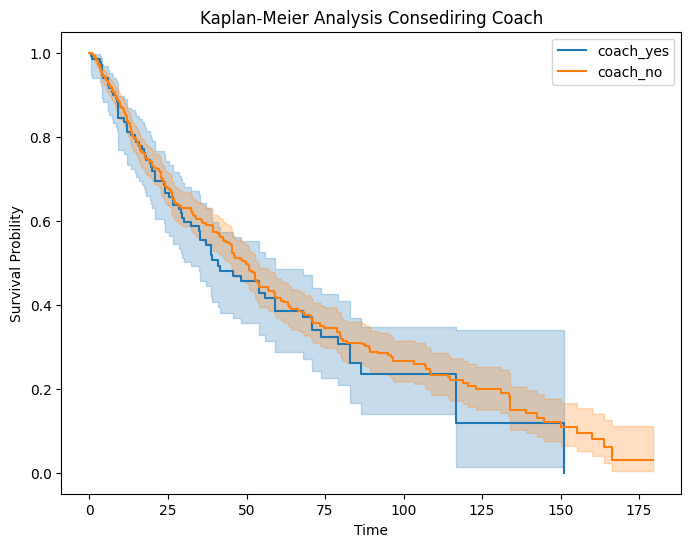

In [489]:
model_coach_yes.plot(figsize = (8,6), label = "coach_yes")
model_coach_no.plot(label = "coach_no")
plt.title("Kaplan-Meier Analysis Consediring Coach")
plt.xlabel("Time")
plt.ylabel("Survival Probility")

#CoxPHFitter

In [504]:
df = pd.read_csv("/content/employeeturnover.csv", encoding='ISO-8859-1')
df.head()  

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


**For Gender**

In [505]:
data_gender = df[['stag','gender','event']]

In [506]:
data_gender.head()

,stag,gender,event
0,7.030801,m,1
1,22.965092,m,1
2,15.934292,f,1
3,15.934292,f,1
4,8.410678,m,1


In [507]:
#Female = 0
#Male = 1

data_gender['gender'] = data_gender['gender'].map({'f': 0, 'm': 1})

<ipython-input-507-f4226a81eab1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gender['gender'] = data_gender['gender'].map({'f': 0, 'm': 1})


In [508]:
cph_gender = CoxPHFitter()

cph_gender.fit(data_gender, duration_col='stag', event_col='event')

cph_gender.print_summary()

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3469.10
         time fit was run = 2023-04-09 00:14:15 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
gender     -0.15       0.86       0.10            -0.35             0.04                 0.71                 1.04

            cmp to     z    p   -log2(p)
covariate                               
gender        0.00 -1.53 0.13       2.99
---
Concordance = 0.52
Partial AIC = 6940.20
log-likelihood ratio test = 2.40 on 1 df
-log2(p) of ll-ratio test = 3.04

Text(0, 0.5, 'Survival Probility')

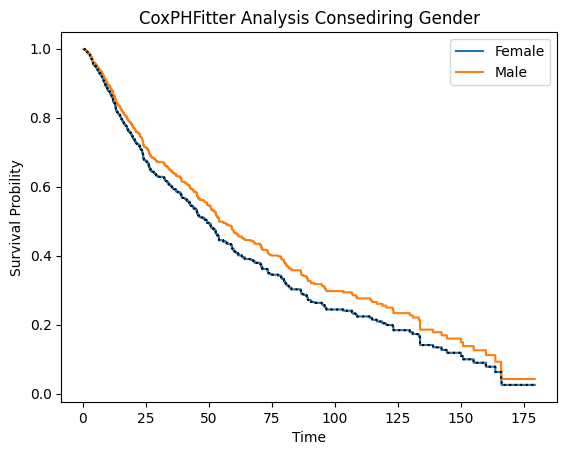

In [509]:
cph_gender.plot_covariate_groups('gender', [0,1])


plt.title("CoxPHFitter Analysis Consediring Gender")
plt.legend(['Female', 'Male'])
plt.xlabel("Time")
plt.ylabel("Survival Probility")

In [510]:
data_gender_female_median = data_gender.loc[data_gender['gender']==0]['stag'].median()
data_gender_male_median = data_gender.loc[data_gender['gender']==1]['stag'].median()
print("Median tenure of female employees: ", data_gender_female_median)
print("Median tenure of male employees: ", data_gender_male_median)

Median tenure of female employees:  23.9835729
Median tenure of male employees:  28.59958932


**For Coach**

In [511]:
data_coach = df[['stag','coach','event']]

In [512]:
data_coach.head()

,stag,coach,event
0,7.030801,no,1
1,22.965092,no,1
2,15.934292,no,1
3,15.934292,no,1
4,8.410678,yes,1


In [513]:
#Coach Yes = 0
#Coach No = 1

data_coach['coach'] = data_coach['coach'].map({'yes': 0, 'no': 1})

<ipython-input-513-f98635f0146b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coach['coach'] = data_coach['coach'].map({'yes': 0, 'no': 1})


In [514]:
data_coach = data_coach.dropna()

In [515]:
cph_coach = CoxPHFitter()

cph_coach.fit(data_coach, duration_col='stag', event_col='event')

cph_coach.print_summary()

<lifelines.CoxPHFitter: fitted with 815 total observations, 389 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 815
number of events observed = 426
   partial log-likelihood = -2448.19
         time fit was run = 2023-04-09 00:14:16 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
coach      -0.09       0.92       0.13            -0.34             0.16                 0.71                 1.18

            cmp to     z    p   -log2(p)
covariate                               
coach         0.00 -0.69 0.49       1.02
---
Concordance = 0.51
Partial AIC = 4898.37
log-likelihood ratio test = 0.46 on 1 df
-log2(p) of ll-ratio test = 1.01

Text(0, 0.5, 'Survival Probility')

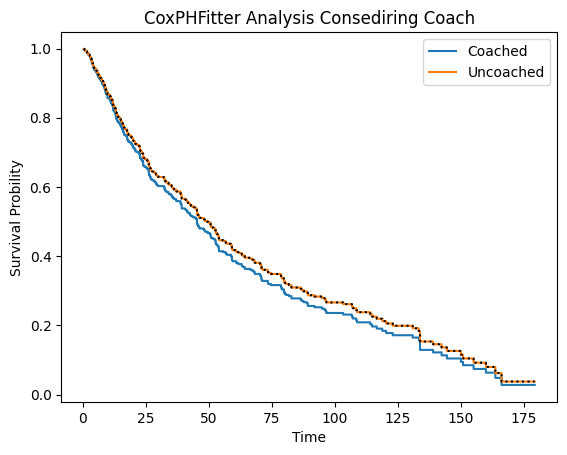

In [516]:
cph_coach.plot_covariate_groups('coach', [0,1])

plt.title("CoxPHFitter Analysis Consediring Coach")
plt.legend(['Coached', 'Uncoached'])
plt.xlabel("Time")
plt.ylabel("Survival Probility")

In [517]:
coached_median = data_coach.loc[data_coach['coach']==0]['stag'].median()
uncoached_median = data_coach.loc[data_coach['coach']==1]['stag'].median()
print("Median tenure of coached employees: ", coached_median)
print("Median tenure of uncoached employees: ", uncoached_median)

Median tenure of coached employees:  27.022587270000002
Median tenure of uncoached employees:  23.45790554
